# IMPORT IMPORTANT LIABRARIES

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# DATA READING

In [2]:
df = pd.read_csv("Bank-Records.csv")

In [109]:
df.shape

(10000, 18)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [49]:
df_churn = df[df['Exited'] == 1]

In [51]:
df_churn.shape

(2038, 18)

In [53]:
df_churn.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1,1,3,DIAMOND,377


In [50]:
df_not_churn = df[df['Exited'] == 0]

In [52]:
df_not_churn.shape

(7962, 18)

In [54]:
df_not_churn.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350


### CHECK DATASET SIZE

In [4]:
df.shape

(10000, 18)

### DATASET COLUMNS INFORMATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### NULL VALUES CHECK FOR EACH COLUMN

In [6]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### OBSERVATION

In [18]:
# THERE ARE TOTAL 10000 ROWS AND 18 COLUMNS
# THERE IS NO MISSING VALUES IN THE DATASET

# EXPLORATORY DATA ANALYSIS - EDA

### STATISTICAL ANALYSIS FOR NUMERICAL COLUMNS

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### OBSERVATION

In [19]:
# CUSTOMERS HAVE THE CREDIT SCORES FROM AS LOW AS FROM 350 AND TO AS HIGH AS 850 
# THIS DATA HAVE THE CUSTOMERS FROM ACROSS THE AGE RANGES FROM 18 YEARS TO 92 YEARS
# NumOfProducts THAT CUSTOMERS ARE USING IS BETWEEN 1 TO 4

### STATISTICAL ANALYSIS FOR CATEGORICAL COLUMNS

In [13]:
df.describe(include = 'object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


### OBSERVATION

In [20]:
# WE HAVE THE DATA FROM 3 LOCATIONS IN WHICH "FRANCE" IS THE PLACE FROM WHERE THE MOST CUTOMERS COMING
# THERE ARE 4 TYPES OF CARDS IN WHICH "DIAMOND" IS THE MOST USED CARD FOR THE CUSTOMERS IN THE DATA

### DISTRIBTION OF TARGETED COLUMN

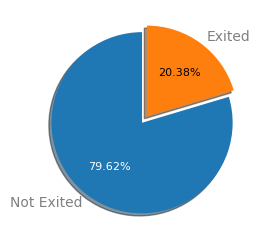

In [15]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

### OBSERVATION

In [ ]:
# HERE WE CAN SEE THAT DATA IS IMBALANCE AS THERE IS 20% DATA WHICH ARE CHURNING

# HELPER FUNCTIONS

In [89]:
def chi_square_test(column1, column2, significance_level=0.05):
    # Create a contingency table
    contingency_table = pd.crosstab(column1, column2)

    # Perform Chi-square test for independence
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print the results
    print(f"P-value: {p}")

    # Compare p-value to the significance level
    if p < significance_level:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")

# VISUALIZING CATEGORICAL VARIABLE

### EXITED BY GEOGRAPHY

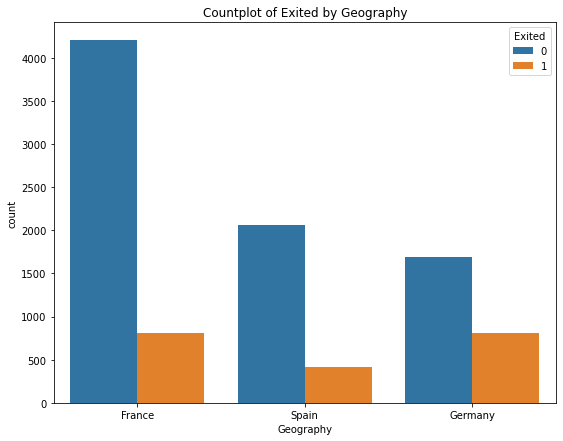

In [68]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by Geography')
plt.show()

In [90]:
chi_square_test(df['Geography'], df['Exited'])

P-value: 5.245736109572763e-66
Reject the null hypothesis. There is a significant difference.


In [99]:
# NUMBER OF PEOPLE EXITED FROM GERMANY IS HIGHER THAN OTHER GEOGRAPHY
# NEED TO FOCUS GEOGRAPHY WISE

### EXITED BY GENDER

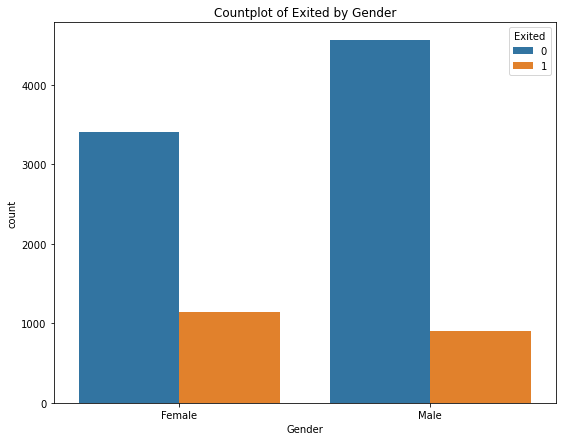

In [35]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by Gender')
plt.show()

In [91]:
chi_square_test(df['Gender'], df['Exited'])

P-value: 2.9253677618642e-26
Reject the null hypothesis. There is a significant difference.


In [103]:
# NUMBER OF FEMALE EXITED IS HIGHER THAN THE NUMBER OF MALE
# NEED TO FOCUS ON THE CHURN RATE BY GENDER

### EXITED BY TENURE

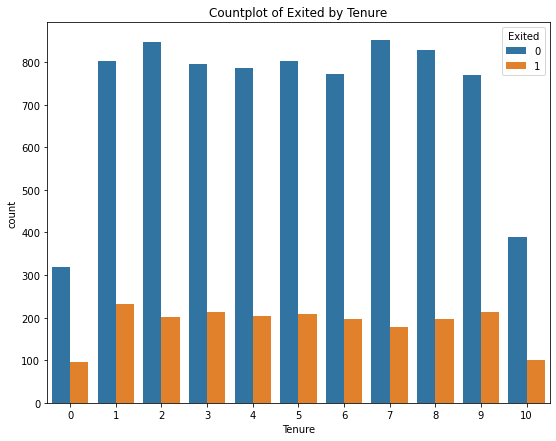

In [36]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by Tenure')
plt.show()

In [92]:
chi_square_test(df['Tenure'], df['Exited'])

P-value: 0.17035079254617927
Fail to reject the null hypothesis. No significant difference.


In [102]:
# WE CAN OBSERVE THAT FROM TENURE 1 TO 9 MORE PEOPLE ARE LOOSING FROM THE BANK
# NO NEED TO FOCUS ON THE CHURN RATE BY GENDER

### EXITED BY NumOfProducts

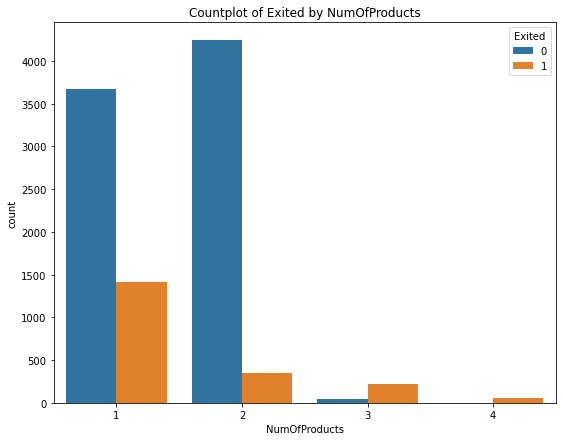

In [37]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by NumOfProducts')
plt.show()

In [93]:
chi_square_test(df['NumOfProducts'], df['Exited'])

P-value: 0.0
Reject the null hypothesis. There is a significant difference.


MORE CUSTOMERS ARE LOOSING WHO HAVE LESSER NUMBER OF PRODUCTS WITH THEM

NEED TO FOCUS ON THE CHURN RATE BY NumOfProducts

### EXITED BY HasCrCard

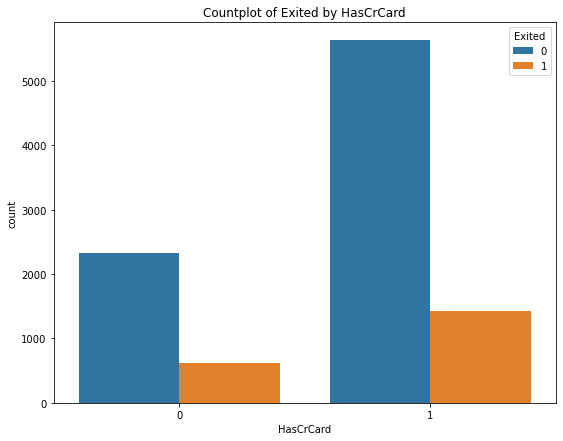

In [38]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by HasCrCard')
plt.show()

In [94]:
chi_square_test(df['HasCrCard'], df['Exited'])

P-value: 0.5026181509009862
Fail to reject the null hypothesis. No significant difference.


In [104]:
# MORE CUSTOMERS LOOSING WHO HAVE CREDIT CARDS
# No NEED TO FOCUS ON THE CHURN RATE BY HasCrCard

### EXITED BY IsActiveMember

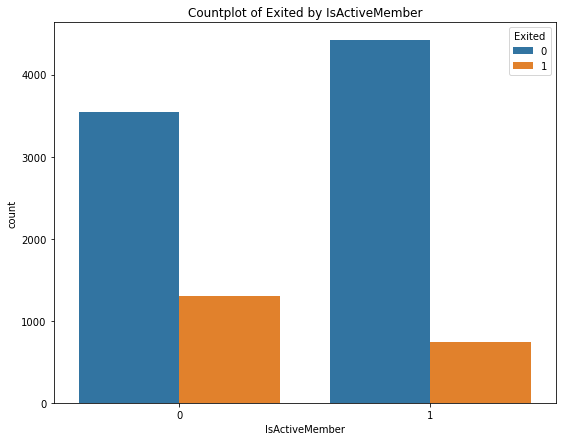

In [39]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by IsActiveMember')
plt.show()

In [95]:
chi_square_test(df['IsActiveMember'], df['Exited'])

P-value: 6.1531674381134086e-55
Reject the null hypothesis. There is a significant difference.


In [105]:
# CUSTOMERS ARE MORE LIKELY TO CHURN WHO ARE INACTIVE MEMBERS
# NEED TO FOCUS ON THE CHURN RATE BY IsActiveMember

### EXITED BY COMPLAIN

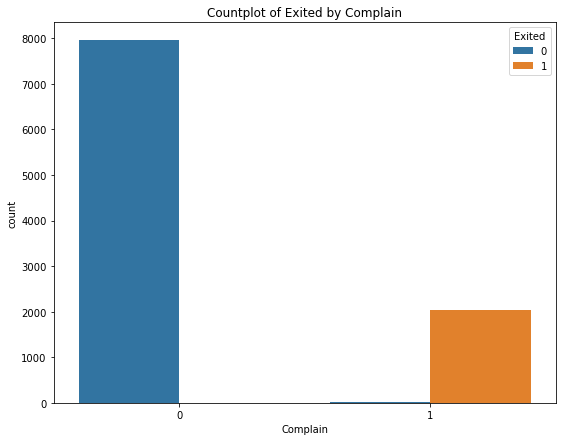

In [57]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Complain', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by Complain')
plt.show()

In [96]:
chi_square_test(df['Complain'], df['Exited'])

P-value: 0.0
Reject the null hypothesis. There is a significant difference.


In [106]:
# THOSE HAVE COMPLAIN ARE MORE LIKELY TO LOOSE THE BANK
# NEED TO FOCUS ON THE CHURN RATE BY Complain

### EXITED BY SATISFACTION SCORE

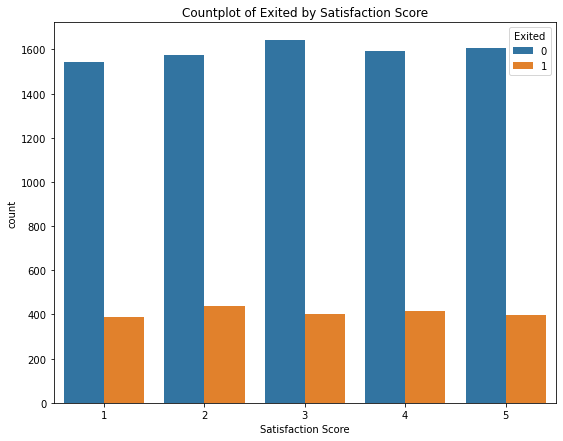

In [61]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Satisfaction Score', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by Satisfaction Score')
plt.show()

In [97]:
chi_square_test(df['Satisfaction Score'], df['Exited'])

P-value: 0.43336497327743106
Fail to reject the null hypothesis. No significant difference.


In [107]:
# NO CLEAR OUTPUT HERE I AM GETTING
# No NEED TO FOCUS ON THE CHURN RATE BY Satisfaction Score

### EXITED BY CARD TYPE

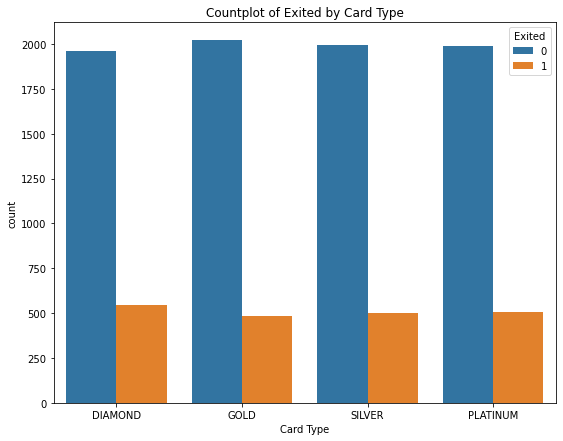

In [64]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x='Card Type', hue='Exited', data=df, ax=ax)
plt.title('Countplot of Exited by Card Type')
plt.show()

In [98]:
chi_square_test(df['Card Type'], df['Exited'])

P-value: 0.16794112067810177
Fail to reject the null hypothesis. No significant difference.


In [108]:
# PEOPLE WHO HAVE DIAMOND CARDS ARE CHURNING MORE FROM THE BANK
# No NEED TO FOCUS ON THE CHURN RATE BY Card Type

# VISUALIZING CONTINUOUS VARIABLES

### EXITED BY CREDIT SCORE

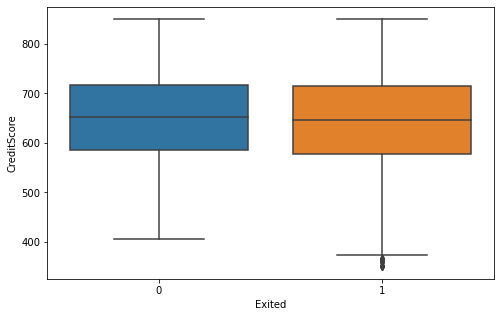

In [40]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax)
plt.show()

NO SIGNIFICANT RELATIONSHIPS SHOWS BETWEEN CREDIT SCORE AND THE PEOPLE WHO ARE CHURNING OUT

### EXITED BY AGE

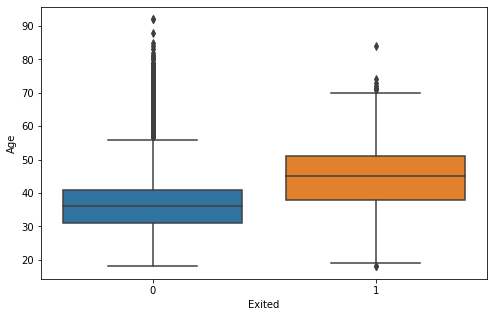

In [41]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax)
plt.show()

MORE OLDER PEOPLE ARE LOOSING FROM BANK THAN THE YOUNGER ONES

### EXITED BY BALANCE

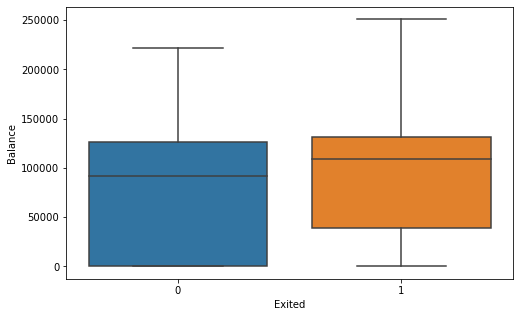

In [42]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax)
plt.show()

PEOPLE WITH BETTER BALANCE ARE LOOSING THE BANK MORE

### EXITED BY ESTIMATEDSALARY

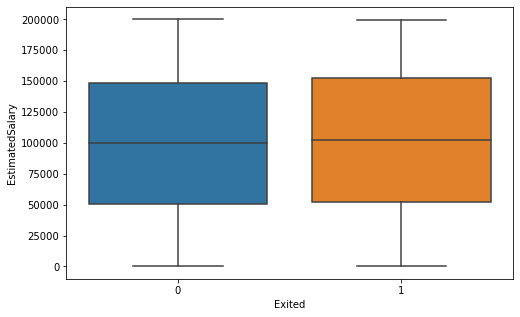

In [43]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax)
plt.show()

### EXITED BY POINT EARNED

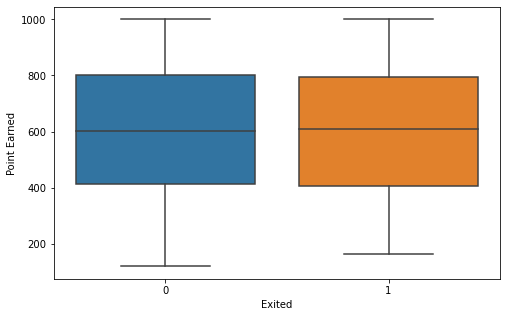

In [66]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = 'Exited', y = 'Point Earned', data = df, ax = ax)
plt.show()

In [67]:
# NO SIGNIFICANT OBSERVATION

NO SIGNIFICANT DIFFERNCE FOR ESTIMATEDSALARY AND THE PEOPLE WHO ARE CHURNING FROM THE BANK